<a href="https://colab.research.google.com/github/andersonesteban/pagina1/blob/main/bancos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np

In [352]:
bancos = pd.read_csv('https://www.datos.gov.co/resource/35qi-guj5.csv')
bancos


,identificacion_segmento,nombre,telefono_dc,telefono2_dc,telefono3_dc,telefono_dj,correo_electronico_dc,correo_electronico_dj
0,BANCOS Y CORPORACIONES FINANCIERAS,MONTES DE BOLIVAR NELLY MARIA,3166937841,0,0,3166937841,delybolivar@gmail.com,delybolivar@gmail.com
1,BANCOS Y CORPORACIONES FINANCIERAS,LIDER FINANZAS DE LA COSTA S.A.S,3015762895,0,0,3015762895,liderfinanzasdelacosta@gmail.com,liderfinanzasdelacosta@gmail.com
2,BANCOS Y CORPORACIONES FINANCIERAS,INVERSIONES G.R.G. S.A.S.,3600077,3603030,0,3600077,contadorpuntotaxi@taxi386.com,contadorpuntotaxi@taxi386.com
3,BANCOS Y CORPORACIONES FINANCIERAS,JIMENEZ GALEANO BELSY PATRICIA,3122574998,3008423690,0,3122574998,valoras.asesoriasfinanciera@gmail.com,valoras.asesoriasfinanciera@gmail.com
4,BANCOS Y CORPORACIONES FINANCIERAS,CLINICREDITO.COM S.A.S.,3212403867,0,0,3212403867,clinicredito@gmail.com,clinicredito@gmail.com
5,BANCOS Y CORPORACIONES FINANCIERAS,COOFINANCIERA SOLUCIONES S.A.S.,3043808479,3016204180,0,3043808479,coofinancierasolucionesas@gmail.com,coofinancierasolucionesas@gmail.com
6,BANCOS Y CORPORACIONES FINANCIERAS,CVP ASESORIAS Y SERVICIOS S.A.S.,3156398616,0,0,3156398616,claudiavargas73@hotmail.com,claudiavargas73@hotmail.com
7,BANCOS Y CORPORACIONES FINANCIERAS,BANCO SERFINANZA S.A,3091919,0,0,3091919,info@bancoserfinanza.com,notificacionesjudiciales@bancoserfinanza.com
8,BANCOS Y CORPORACIONES FINANCIERAS,SERGIO RAMIREZ GARCIA COMUNICACIONES S. EN C.,3228282,3853590,0,3228282,1520radio@gmail.com,1520radio@gmail.com
9,BANCOS Y CORPORACIONES FINANCIERAS,CREDIAPP S.A.S.,3002507287,0,0,3002507287,gerencia@crediapp.co,gerencia@crediapp.co


In [353]:
bancos = bancos.drop(['telefono2_dc','telefono3_dc','telefono_dj','correo_electronico_dj'],axis=1)
bancos


,identificacion_segmento,nombre,telefono_dc,correo_electronico_dc
0,BANCOS Y CORPORACIONES FINANCIERAS,MONTES DE BOLIVAR NELLY MARIA,3166937841,delybolivar@gmail.com
1,BANCOS Y CORPORACIONES FINANCIERAS,LIDER FINANZAS DE LA COSTA S.A.S,3015762895,liderfinanzasdelacosta@gmail.com
2,BANCOS Y CORPORACIONES FINANCIERAS,INVERSIONES G.R.G. S.A.S.,3600077,contadorpuntotaxi@taxi386.com
3,BANCOS Y CORPORACIONES FINANCIERAS,JIMENEZ GALEANO BELSY PATRICIA,3122574998,valoras.asesoriasfinanciera@gmail.com
4,BANCOS Y CORPORACIONES FINANCIERAS,CLINICREDITO.COM S.A.S.,3212403867,clinicredito@gmail.com
5,BANCOS Y CORPORACIONES FINANCIERAS,COOFINANCIERA SOLUCIONES S.A.S.,3043808479,coofinancierasolucionesas@gmail.com
6,BANCOS Y CORPORACIONES FINANCIERAS,CVP ASESORIAS Y SERVICIOS S.A.S.,3156398616,claudiavargas73@hotmail.com
7,BANCOS Y CORPORACIONES FINANCIERAS,BANCO SERFINANZA S.A,3091919,info@bancoserfinanza.com
8,BANCOS Y CORPORACIONES FINANCIERAS,SERGIO RAMIREZ GARCIA COMUNICACIONES S. EN C.,3228282,1520radio@gmail.com
9,BANCOS Y CORPORACIONES FINANCIERAS,CREDIAPP S.A.S.,3002507287,gerencia@crediapp.co


In [354]:
bancos["mejores bancos del 1 al 100"]=[
    20, 80, 60, 1, 0, 8, 25, 0, 10, 75, 100, 9, 62, 100, 90, 99, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100, 90, 99, 29, 30, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100, 90, 99, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100
    ]

In [355]:
bancos

,identificacion_segmento,nombre,telefono_dc,correo_electronico_dc,mejores bancos del 1 al 100
0,BANCOS Y CORPORACIONES FINANCIERAS,MONTES DE BOLIVAR NELLY MARIA,3166937841,delybolivar@gmail.com,20
1,BANCOS Y CORPORACIONES FINANCIERAS,LIDER FINANZAS DE LA COSTA S.A.S,3015762895,liderfinanzasdelacosta@gmail.com,80
2,BANCOS Y CORPORACIONES FINANCIERAS,INVERSIONES G.R.G. S.A.S.,3600077,contadorpuntotaxi@taxi386.com,60
3,BANCOS Y CORPORACIONES FINANCIERAS,JIMENEZ GALEANO BELSY PATRICIA,3122574998,valoras.asesoriasfinanciera@gmail.com,1
4,BANCOS Y CORPORACIONES FINANCIERAS,CLINICREDITO.COM S.A.S.,3212403867,clinicredito@gmail.com,0
5,BANCOS Y CORPORACIONES FINANCIERAS,COOFINANCIERA SOLUCIONES S.A.S.,3043808479,coofinancierasolucionesas@gmail.com,8
6,BANCOS Y CORPORACIONES FINANCIERAS,CVP ASESORIAS Y SERVICIOS S.A.S.,3156398616,claudiavargas73@hotmail.com,25
7,BANCOS Y CORPORACIONES FINANCIERAS,BANCO SERFINANZA S.A,3091919,info@bancoserfinanza.com,0
8,BANCOS Y CORPORACIONES FINANCIERAS,SERGIO RAMIREZ GARCIA COMUNICACIONES S. EN C.,3228282,1520radio@gmail.com,10
9,BANCOS Y CORPORACIONES FINANCIERAS,CREDIAPP S.A.S.,3002507287,gerencia@crediapp.co,75


In [356]:
bancos["personas que prefieron los distintos bancos"]=[90, 99, 29, 30, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100, 90, 99, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100, 20, 80, 60, 1, 0, 8, 25, 0, 10, 75, 100, 9, 62, 100, 90, 99, 80, 60, 10, 8, 25, 0, 10, 75, 100, 9, 62, 100
                                                       ]

In [357]:
bancos

,identificacion_segmento,nombre,telefono_dc,correo_electronico_dc,mejores bancos del 1 al 100,personas que prefieron los distintos bancos
0,BANCOS Y CORPORACIONES FINANCIERAS,MONTES DE BOLIVAR NELLY MARIA,3166937841,delybolivar@gmail.com,20,90
1,BANCOS Y CORPORACIONES FINANCIERAS,LIDER FINANZAS DE LA COSTA S.A.S,3015762895,liderfinanzasdelacosta@gmail.com,80,99
2,BANCOS Y CORPORACIONES FINANCIERAS,INVERSIONES G.R.G. S.A.S.,3600077,contadorpuntotaxi@taxi386.com,60,29
3,BANCOS Y CORPORACIONES FINANCIERAS,JIMENEZ GALEANO BELSY PATRICIA,3122574998,valoras.asesoriasfinanciera@gmail.com,1,30
4,BANCOS Y CORPORACIONES FINANCIERAS,CLINICREDITO.COM S.A.S.,3212403867,clinicredito@gmail.com,0,80
5,BANCOS Y CORPORACIONES FINANCIERAS,COOFINANCIERA SOLUCIONES S.A.S.,3043808479,coofinancierasolucionesas@gmail.com,8,60
6,BANCOS Y CORPORACIONES FINANCIERAS,CVP ASESORIAS Y SERVICIOS S.A.S.,3156398616,claudiavargas73@hotmail.com,25,10
7,BANCOS Y CORPORACIONES FINANCIERAS,BANCO SERFINANZA S.A,3091919,info@bancoserfinanza.com,0,8
8,BANCOS Y CORPORACIONES FINANCIERAS,SERGIO RAMIREZ GARCIA COMUNICACIONES S. EN C.,3228282,1520radio@gmail.com,10,25
9,BANCOS Y CORPORACIONES FINANCIERAS,CREDIAPP S.A.S.,3002507287,gerencia@crediapp.co,75,0


In [358]:
#filtrado de los datos
x = bancos[bancos["personas que prefieron los distintos bancos"]==100]
y = bancos[bancos["mejores bancos del 1 al 100"]==30]
y, x

(               identificacion_segmento  \
 31  BANCOS Y CORPORACIONES FINANCIERAS   
 
                                           nombre  telefono_dc  \
 31  CREDIFAMILIA COMPAÑIA DE FINANCIAMIENTO S.A.      6050300   
 
    correo_electronico_dc  mejores bancos del 1 al 100  \
 31                   NaN                           30   
 
     personas que prefieron los distintos bancos  
 31                                           80  ,
                identificacion_segmento  \
 12  BANCOS Y CORPORACIONES FINANCIERAS   
 15  BANCOS Y CORPORACIONES FINANCIERAS   
 26  BANCOS Y CORPORACIONES FINANCIERAS   
 29  BANCOS Y CORPORACIONES FINANCIERAS   
 40  BANCOS Y CORPORACIONES FINANCIERAS   
 43  BANCOS Y CORPORACIONES FINANCIERAS   
 54  BANCOS Y CORPORACIONES FINANCIERAS   
 57  BANCOS Y CORPORACIONES FINANCIERAS   
 
                                                nombre  telefono_dc  \
 12                            AB BUSINESS CAPITAL SAS   3164109272   
 15                       

In [359]:
datos = bancos[["personas que prefieron los distintos bancos", "mejores bancos del 1 al 100",]]
clase = bancos["mejores bancos del 1 al 100"]

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)
datos

array([[0.9 , 0.2 ],
       [0.99, 0.8 ],
       [0.29, 0.6 ],
       [0.3 , 0.01],
       [0.8 , 0.  ],
       [0.6 , 0.08],
       [0.1 , 0.25],
       [0.08, 0.  ],
       [0.25, 0.1 ],
       [0.  , 0.75],
       [0.1 , 1.  ],
       [0.75, 0.09],
       [1.  , 0.62],
       [0.09, 1.  ],
       [0.62, 0.9 ],
       [1.  , 0.99],
       [0.9 , 0.8 ],
       [0.99, 0.6 ],
       [0.8 , 0.1 ],
       [0.6 , 0.08],
       [0.1 , 0.25],
       [0.08, 0.  ],
       [0.25, 0.1 ],
       [0.  , 0.75],
       [0.1 , 1.  ],
       [0.75, 0.09],
       [1.  , 0.62],
       [0.09, 1.  ],
       [0.62, 0.9 ],
       [1.  , 0.99],
       [0.2 , 0.29],
       [0.8 , 0.3 ],
       [0.6 , 0.8 ],
       [0.01, 0.6 ],
       [0.  , 0.1 ],
       [0.08, 0.08],
       [0.25, 0.25],
       [0.  , 0.  ],
       [0.1 , 0.1 ],
       [0.75, 0.75],
       [1.  , 1.  ],
       [0.09, 0.09],
       [0.62, 0.62],
       [1.  , 1.  ],
       [0.9 , 0.9 ],
       [0.99, 0.99],
       [0.8 , 0.8 ],
       [0.6 ,

In [360]:
clase

0      20
1      80
2      60
3       1
4       0
5       8
6      25
7       0
8      10
9      75
10    100
11      9
12     62
13    100
14     90
15     99
16     80
17     60
18     10
19      8
20     25
21      0
22     10
23     75
24    100
25      9
26     62
27    100
28     90
29     99
30     29
31     30
32     80
33     60
34     10
35      8
36     25
37      0
38     10
39     75
40    100
41      9
42     62
43    100
44     90
45     99
46     80
47     60
48     10
49      8
50     25
51      0
52     10
53     75
54    100
55      9
56     62
57    100
Name: mejores bancos del 1 al 100, dtype: int64

In [361]:
datos

array([[0.9 , 0.2 ],
       [0.99, 0.8 ],
       [0.29, 0.6 ],
       [0.3 , 0.01],
       [0.8 , 0.  ],
       [0.6 , 0.08],
       [0.1 , 0.25],
       [0.08, 0.  ],
       [0.25, 0.1 ],
       [0.  , 0.75],
       [0.1 , 1.  ],
       [0.75, 0.09],
       [1.  , 0.62],
       [0.09, 1.  ],
       [0.62, 0.9 ],
       [1.  , 0.99],
       [0.9 , 0.8 ],
       [0.99, 0.6 ],
       [0.8 , 0.1 ],
       [0.6 , 0.08],
       [0.1 , 0.25],
       [0.08, 0.  ],
       [0.25, 0.1 ],
       [0.  , 0.75],
       [0.1 , 1.  ],
       [0.75, 0.09],
       [1.  , 0.62],
       [0.09, 1.  ],
       [0.62, 0.9 ],
       [1.  , 0.99],
       [0.2 , 0.29],
       [0.8 , 0.3 ],
       [0.6 , 0.8 ],
       [0.01, 0.6 ],
       [0.  , 0.1 ],
       [0.08, 0.08],
       [0.25, 0.25],
       [0.  , 0.  ],
       [0.1 , 0.1 ],
       [0.75, 0.75],
       [1.  , 1.  ],
       [0.09, 0.09],
       [0.62, 0.62],
       [1.  , 1.  ],
       [0.9 , 0.9 ],
       [0.99, 0.99],
       [0.8 , 0.8 ],
       [0.6 ,

In [362]:
# Dividir el conjunto de datos en entrenamiento y prueba
datos_train, datos_test, clase_train, clase_test = train_test_split(datos, clase, test_size=0.25, random_state=42)

In [363]:
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

In [364]:
# Entrenar el clasificador
clasificador.fit(datos_train, clase_train)

KNeighborsClassifier(n_neighbors=3)

In [365]:
clase_pred = clasificador.predict(datos_test)

In [366]:
accuracy = accuracy_score(clase_test, clase_pred)
print("Precisión: {:.2f}%".format(accuracy * 100))

Precisión: 33.33%


In [367]:
# Calcular la precisión del modelo
precision = precision_score(clase_test, clase_pred, average='macro')

# Calcular el recall del modelo
recall = recall_score(clase_test, clase_pred, average='macro')

# Calcular la puntuación F1 del modelo
f1 = f1_score(clase_test, clase_pred, average='macro')

print("Precisión: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Puntuación F1: {:.2f}%".format(f1 * 100))

Precisión: 21.11%
Recall: 28.33%
Puntuación F1: 22.22%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [368]:
confusion_mat = confusion_matrix(clase_test, clase_pred)
print("matriz de confusion")
print(confusion_mat)

matriz de confusion
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


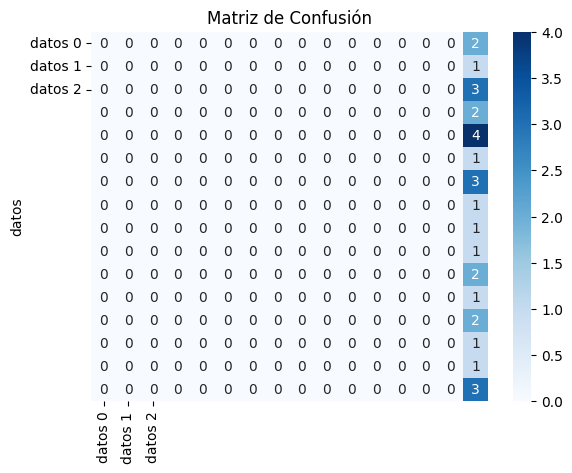

In [375]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear la matriz de confusión con etiquetas para las clases
labels = ["datos 0", "datos 1", "datos 2"]
confusion_mat = confusion_matrix(clase_test, clase_pred)

# Graficar la matriz de confusión como un mapa de calor
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)

# Configurar las etiquetas de los ejes y el título
ax.set_ylabel("datos preferidos")
ax.set_ylabel("datos")
ax.set_title("Matriz de Confusión")

# Mostrar la figura
plt.show()

In [373]:
# Dividir el conjunto de datos en entrenamiento y prueba
datos_train, datos_test, clase_train, clase_test = train_test_split(datos, clase, test_size=0.5, random_state=42)

#modelo red neuronal
model = MLPClassifier(hidden_layer_sizes=(500,), max_iter=4, random_state=42)
model.fit(datos_train , clase_train)

#prediccion
clase_pred = model.predict(datos_test)

#precision del modelo
accuracy = accuracy_score(clase_test, clase_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.10344827586206896


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
